# Planar flows

In [1]:
import torch
import matplotlib.pyplot as plt

from models.PlanarFlowVI import Planar
from target_distribution import TargetDistribution
from utils.VariationalBound import binary_loss_function 
from utils.plot import plot_available_distributions, plot_comparison

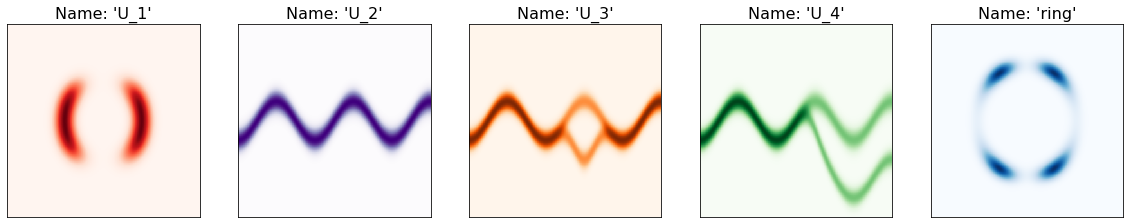

In [2]:
# Plot available distributions.
plot_available_distributions()

In [3]:
# Parameters.
target_distr = "U_1"  
flow_length = 32  
num_batches = 20000  
batch_size = 128 
lr = 6e-4  
axlim = 7 

In [4]:
# Initialise model, loss, and optimiser. 
model = Planar(K=flow_length)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
density = TargetDistribution(target_distr)

In [5]:
# Train model. 
for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = binary_loss_function(density, batch, zk, log_jacobians) #new
    
    # Train. 
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

(batch_num 01000/20000) loss: 2.061534881591797
(batch_num 02000/20000) loss: 0.36381959915161133
(batch_num 03000/20000) loss: 0.02929893136024475
(batch_num 04000/20000) loss: -0.011554718017578125
(batch_num 05000/20000) loss: -0.0022903382778167725
(batch_num 06000/20000) loss: -0.02744901180267334
(batch_num 07000/20000) loss: -0.02071589231491089
(batch_num 08000/20000) loss: -0.03007560968399048
(batch_num 09000/20000) loss: -0.025627225637435913
(batch_num 10000/20000) loss: 0.0033958107233047485
(batch_num 11000/20000) loss: -0.0401957705616951
(batch_num 12000/20000) loss: -0.021615922451019287
(batch_num 13000/20000) loss: -0.042383402585983276
(batch_num 14000/20000) loss: -0.04004216194152832
(batch_num 15000/20000) loss: 0.014365285634994507
(batch_num 16000/20000) loss: -0.0462723970413208
(batch_num 17000/20000) loss: -0.03306432068347931
(batch_num 18000/20000) loss: -0.03276932239532471
(batch_num 19000/20000) loss: -0.02113570272922516
(batch_num 20000/20000) loss: -

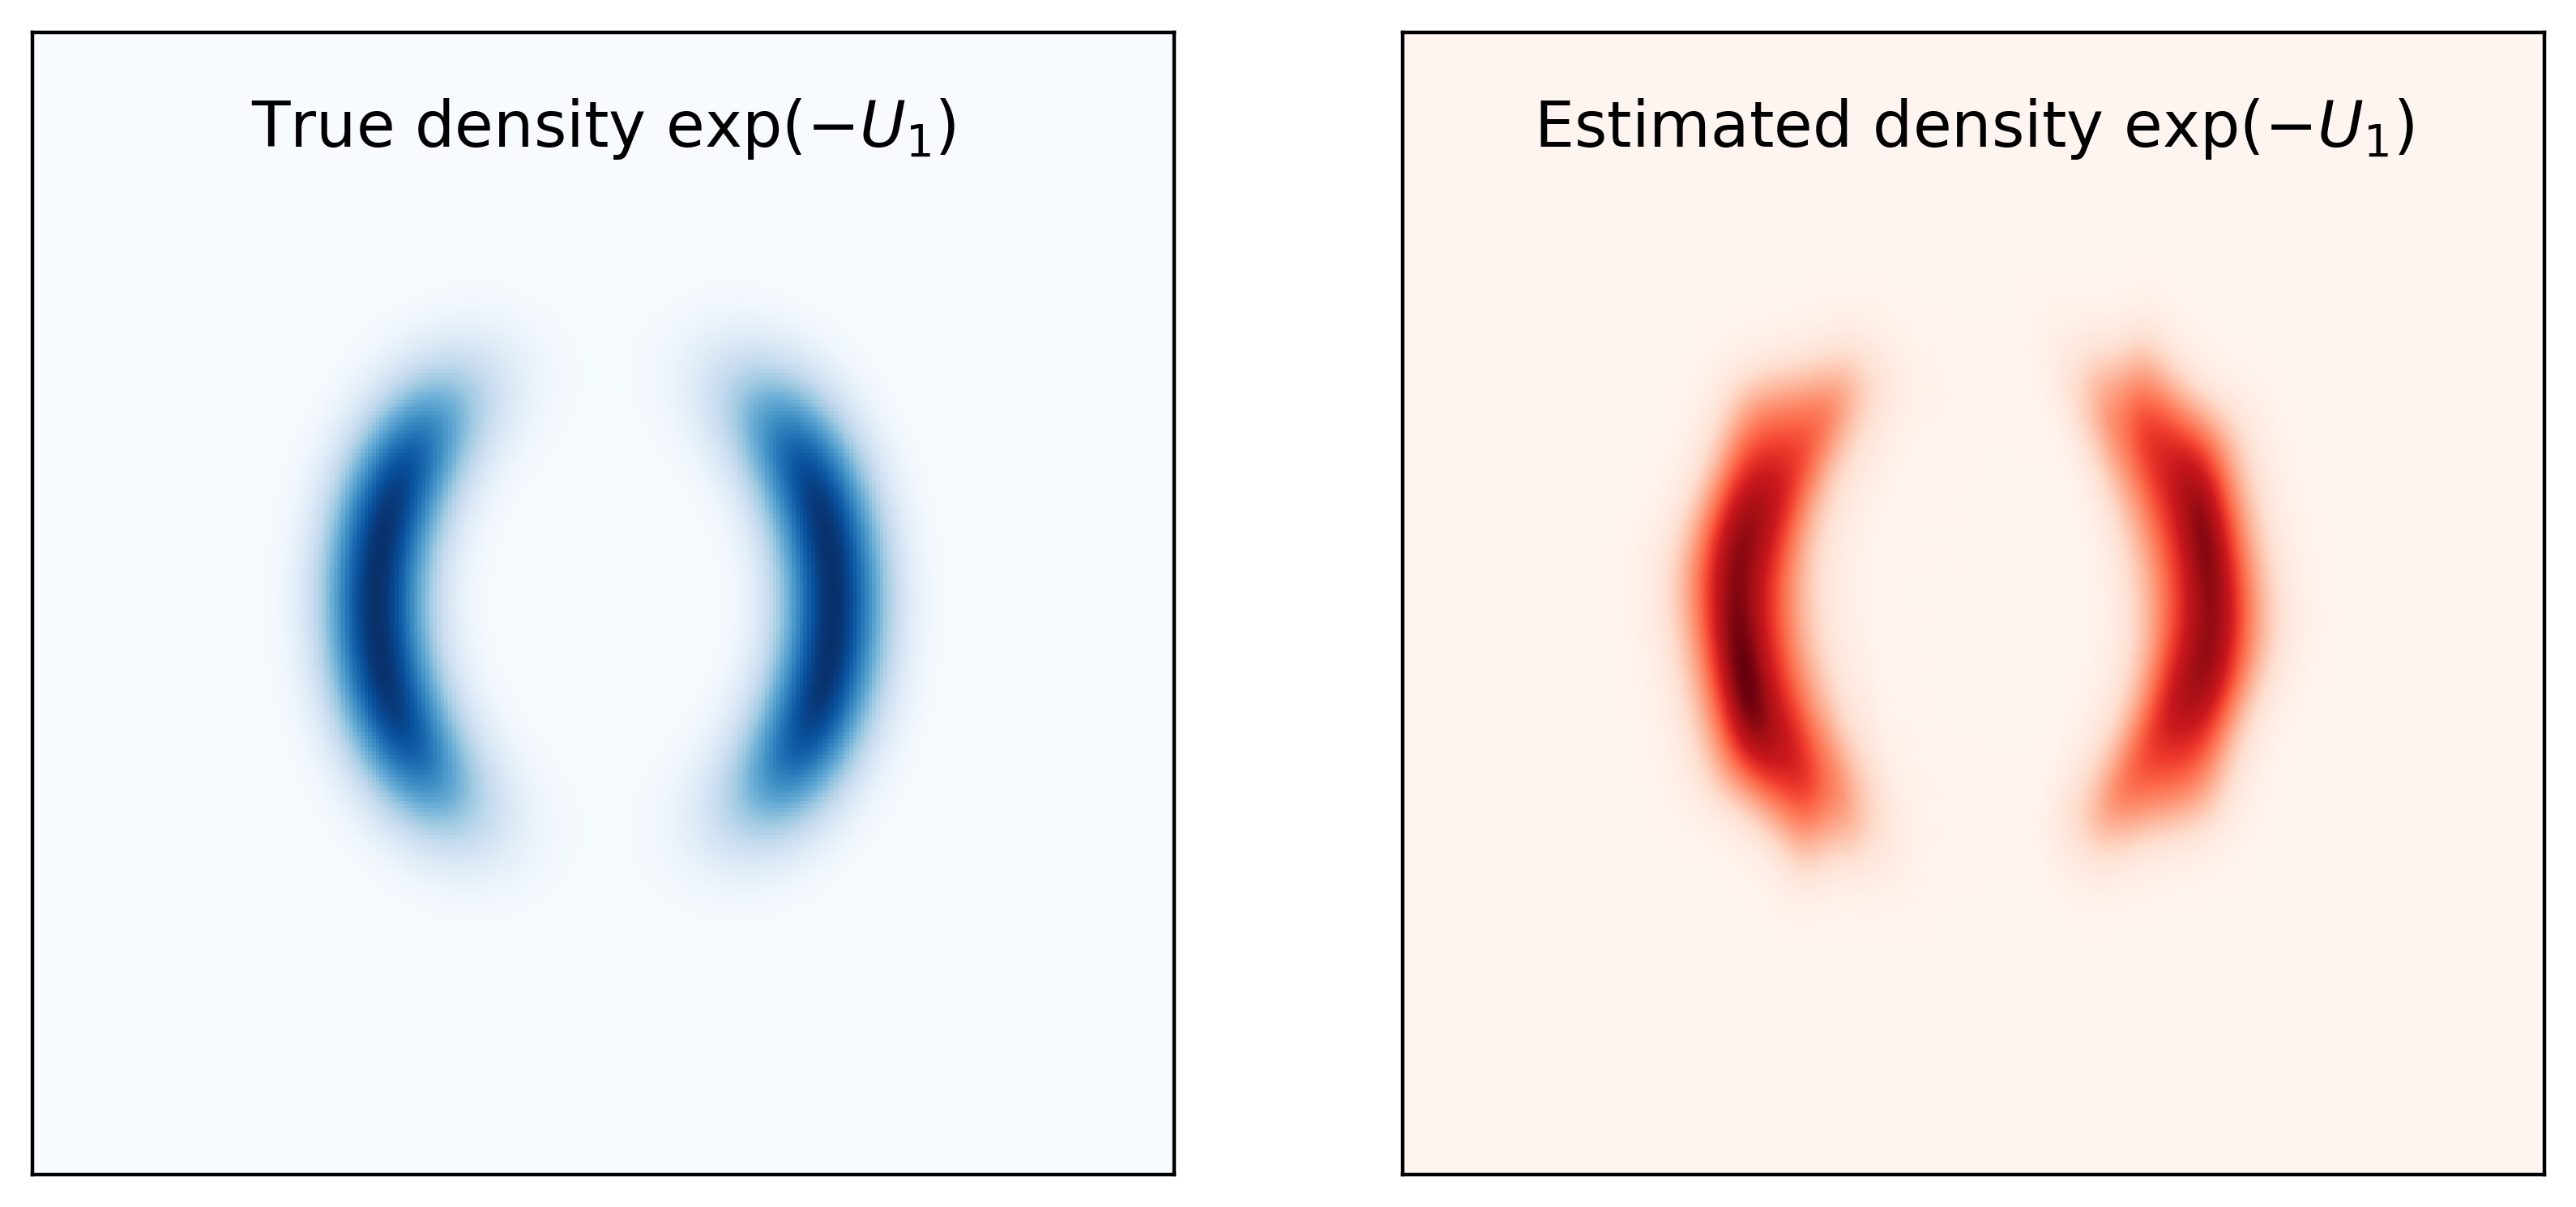

In [7]:
# Plot true and estimated denisty side by side. 
plot_comparison(model, target_distr, flow_length)